For the data from Lab 1 (S1, S2, m1, m2, n1, n2), plot the effectiveness of the k-nn classifier as a function of the number of nearest neighbors from nn=1 to nn=21. Do the same for the TP and TN values. Then draw an additional 10 points from class 1 and 5 points from class 2, treat them as a set of tets and repeat the graphs. If possible, perform averaging after 10 draws.

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.inspection import DecisionBoundaryDisplay
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn import metrics

In [2]:
def draw_data(n1, n2, m1, m2, S1, S2):

    data1 = np.random.multivariate_normal(m1, S1, n1)
    data2 = np.random.multivariate_normal(m2, S2, n2)

    data = np.concatenate((data1, data2), axis = 0)
    data = pd.DataFrame(data, columns=["x", "y"])

    data["klasa"] = np.repeat([0, 1], [n1, n2])
    
    return data

m1, m2 = [-1, -1], [2, 2]
S1 = [[4, 2], [2, 4]]
S2 = [[4, 2], [2, 4]]
n1, n2 = 30, 20

In [3]:
def CM_large(x, y): 
    cm = pd.crosstab(x, y)
    print(cm)
    tn, tp = np.diag(cm)
    # print(tp)
    acc = np.diag(cm).sum() / cm.to_numpy().sum()
    
    return [acc, tn, tp]

In [ ]:
nn=np.arange(1,22)

knn_all=np.zeros(shape=(22,3))
knn_all_test=np.zeros(shape=(22,3))
for i in range(10):
    data = draw_data(n1, n2, m1, m2, S1, S2)
    X = data[["x", "y"]]
    y = data.klasa

    #option 1 - generation of new points for the test
    # data_test = draw_data(10, 5, m1, m2, S1, S2)
    # X_test=data_test[["x", "y"]]
    # y_test=data_test.klasa
    
    #option 2 - checking on a smaller number of points from an already existing pool
    data_test1 = data[y == 0].sample(n=10)
    data_test2 = data[y == 1].sample(n=5)
    data_test=pd.concat([data_test1,data_test2])
    y_test=data_test.klasa
    X_test=data_test[["x", "y"]]

    knn_data=np.zeros(shape=(22,3))
    knn_data_test=np.zeros(shape=(22,3))
    for i in nn:
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(X, y)
        klasy_knn = knn.predict(X)
        klasy_knn_test=knn.predict(X_test)
        knn_data[i] = (CM_large(y,klasy_knn))
        knn_data_test[i] = (CM_large(y_test,klasy_knn_test))
    knn_all=np.add(knn_all,knn_data)
    knn_all_test=np.add(knn_all_test,knn_data_test)
knn_all=knn_all/10
knn_all_test=knn_all_test/10

# print(knn_data)

col_0   0   1
klasa        
0      30   0
1       0  20
col_0   0  1
klasa       
0      10  0
1       0  5
col_0   0   1
klasa        
0      30   0
1       8  12
col_0   0  1
klasa       
0      10  0
1       1  4
col_0   0   1
klasa        
0      27   3
1       2  18
col_0   0  1
klasa       
0      10  0
1       0  5
col_0   0   1
klasa        
0      30   0
1       7  13
col_0   0  1
klasa       
0      10  0
1       1  4
col_0   0   1
klasa        
0      28   2
1       7  13
col_0   0  1
klasa       
0      10  0
1       1  4
col_0   0   1
klasa        
0      29   1
1       7  13
col_0   0  1
klasa       
0      10  0
1       1  4
col_0   0   1
klasa        
0      28   2
1       7  13
col_0   0  1
klasa       
0      10  0
1       1  4
col_0   0   1
klasa        
0      29   1
1       8  12
col_0   0  1
klasa       
0      10  0
1       1  4
col_0   0   1
klasa        
0      28   2
1       7  13
col_0   0  1
klasa       
0      10  0
1       0  5
col_0   0   1
klasa        


In [7]:
df = pd.DataFrame(knn_all, columns =['acc', 'tn', 'tp'], dtype = float)
df=df.drop([0])
# print(df)

df1 = pd.DataFrame(knn_all_test, columns =['acc', 'tn', 'tp'], dtype = float)
df1=df1.drop([0])
# print(df1)

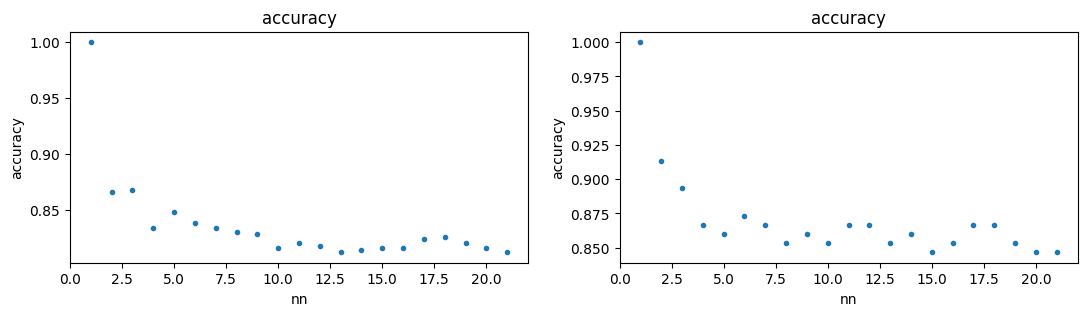

In [8]:
plt.figure(figsize=(13,3))

plt.subplot(1,2,1)
df['acc'].plot(style=".")
plt.title("accuracy")
plt.xlabel('nn')
plt.ylabel('accuracy')
plt.subplot(1,2,2)
df1['acc'].plot(style=".")
plt.title("accuracy")
plt.xlabel('nn')
plt.ylabel('accuracy')
plt.show()

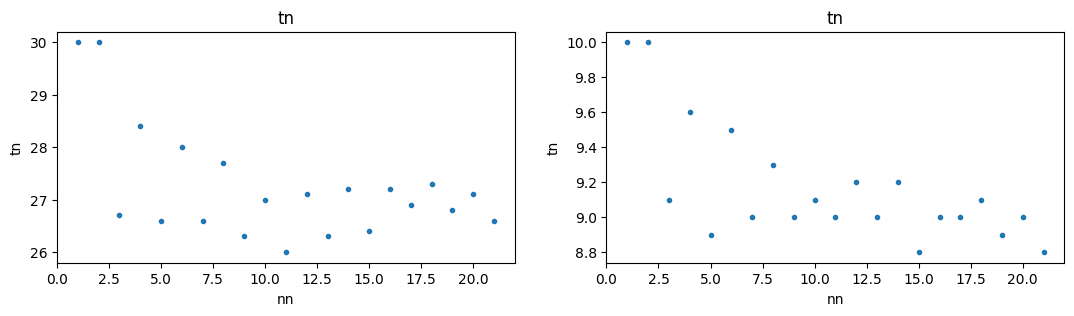

In [9]:
plt.figure(figsize=(13,3))

plt.subplot(1,2,1)
df['tn'].plot(style=".")
plt.title("tn")
plt.xlabel('nn')
plt.ylabel('tn')
plt.subplot(1,2,2)
df1['tn'].plot(style=".")
plt.title("tn")
plt.xlabel('nn')
plt.ylabel('tn')
plt.show()

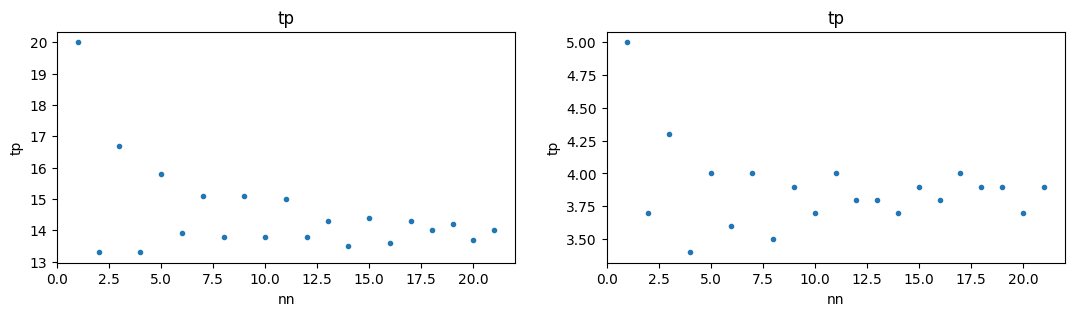

In [10]:
plt.figure(figsize=(13,3))

plt.subplot(1,2,1)
df['tp'].plot(style=".")
plt.title("tp")
plt.xlabel('nn')
plt.ylabel('tp')
plt.subplot(1,2,2)
df1['tp'].plot(style=".")
plt.title("tp")
plt.xlabel('nn')
plt.ylabel('tp')
plt.show()